**Table of contents**

1. Introdcution
2. The goal of the analysis
3. Data handling
4. Methods
5. Next steps

---

#### 1. Introduction
Our project is focused on building an ecosystem monitoring unit that is capable of recording animal sounds. However, the raw audio that has been recorded needs to be sent, processed and analysed in order to achieve our primary goal: to get a good idea about the fauna present at specific locations, at specific times. The better we describe and understand the current inhabitants of those locations, the better we can protect or even restore them. Analysing bioacoustic data (and its metadata) can reveal a lot about local conditions, show correlations, reveal patterns and above all, enable scientists to do their research more efficiently and to protect biodiversity. 

#### 2. The goal of the analysis
One of the interesting questions we could ask when looking at bioacoustic data recorded in order to monitor fauna, is 

**What are the characteristic conditions in which certain species tend to appear more frequently?**

To efficiently  answer this question, no matter which species we would like to look at, we can link together a set of data analysis steps that answer the following questions:
- What kind of data (and metadata) do we have at hand? 
- How do we narrow down our data in order to focus on the relevant information? 
- How do we extract exactly the information we need? Do we need to manipulate the data? 
- How do we link different types of data? 
- How do we identify patterns? 
- How do we present and communicate our findings?  

#### 3. Data Handling

*How was it collected? Where does it come from?*

Our dataset was collected as part of the Stability of Altered Forest Ecosystem (SAFE) research project Continuous bio-acoustic monitoring (https://www.safeproject.net/projects/project_view/175) in the tropical rainforests of Sabah, Borneo. As described, *“the project is set in an area being actively deforested and converted to palm oil plantations, creating the ideal location to study the eﬀect of a changing habitat upon biodiversity.”*

Currently we have access to tabular data describing the recorded audio files (Point_count_recordings) and observations of two research assistants (Point_count_data). These two tables can be linked by the “Point_count_ID” column and therefore locate the corresponding audio segment to each (audio or audio-visual) observation. As the dataset description states, *“associated with each point count is an audio recording file, so (theoretically) this could be used as a training dataset for automated bioacoustic studies”.*

---

*Load your data and observe what state your data is in...*

In [113]:
import pandas as pd

locations = pd.read_csv('csv/Locations.csv')
point_count_rec = pd.read_csv('csv/Point_count_recordings.csv')
point_count_data = pd.read_csv('csv/Point_count_data.csv')

display(locations.head(10))
display(point_count_rec.head(10))
display(point_count_data.head(10))

,Location name,New,Latitude,Longitude,Type,Elevation,ET before arrival,Notes
0,E100 edge,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
1,D100 641,yes,4.71129,117.58753,Transect,479,"20 minutes drive, 30 minutes walk",NaN
2,C10 621,yes,4.71118,117.61899,Transect,403,"15 minutes drive, 45 minutes walk",NaN
3,B10,yes,4.72747,117.61433,Transect,352,takes only 30min to get there (walk + car),NaN
4,E1 648,yes,4.69372,117.58118,Transect,428,"30 minutes drive, 30 minutes walk",NaN
5,D Matrix,yes,4.70272,117.59141,Transect,407,"20 minutes drive, 10 minutes walk","Not really inside the official SAFE matrix, se..."
6,C Matrix,yes,4.71011,117.61071,Transect,271,"10 minutes drive, 20 minutes walk",Semi-permanent marsh nearby (appx. 7 m from re...
7,Riparian 1,yes,4.65041,117.54203,Transect,80,"1 hour drive, 5 minutes walk",NaN
8,Riparian 2,yes,4.65278,117.54653,Transect,172,"1 hour drive, 30 minutes walk",NaN
9,VJR 1,yes,4.66443,117.53513,Transect,312,"1 hour drive, 2 hours walk",NaN


,field_type,ID,ID.1,Location,Date,Time,Comments,Numeric,Numeric.1,Comments.1
0,description,Point count location,Audio file ID,Location in the SAFE landscape,Date of recording,Time of recording,Weather conditions of recording,Research assistant,Research assistant,Notes
1,units,NaN,NaN,NaN,dd/mm/yy,hh:mm:ss,NaN,Binary,Binary,NaN
2,method,NaN,NaN,NaN,NaN,NaN,Observation,Research assistant,Research assistant,NaN
3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Adi_Syamin,Jani,Notes
4,1,18_03_06_1,PC0000_0003,E100 edge,3/6/2018,10:15:00 AM,sun,1,1,NaN
5,2,18_03_06_2,PC0000_0004,E100 edge,3/6/2018,11:00:00 AM,sun,1,1,NaN
6,3,18_03_06_3,PC0000_0005,E100 edge,3/6/2018,12:00:00 PM,sun,1,1,NaN
7,4,18_03_06_4,PC0000_0006,E100 edge,3/6/2018,01:00:00 PM,sun,1,1,NaN
8,5,18_03_06_5,PC0000_0007,E100 edge,3/6/2018,02:00:00 PM,sun,1,1,NaN
9,6,18_03_06_6,PC0000_0008,E100 edge,3/6/2018,03:00:00 PM,sun,1,1,NaN


,field_type,ID,Location,Taxa,Numeric,Time,Time.1,Categorical,Comments
0,description,Point count location,Location in the SAFE landscape,Common name of species seen and/or seen,Estimated distance of species,Time within the Point Count (0-20mins),The time of the observation,Visual or Audio sighting,Notes
1,levels,NaN,NaN,NaN,NaN,NaN,NaN,A;V;AV,NaN
2,units,NaN,NaN,NaN,metres,hh:mm:ss,hh:mm:ss,NaN,NaN
3,method,ID_code,Location,Observation,Observation,NaN,NaN,Observation,NaN
4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
5,1,18_03_06_1,E100 edge,NaN,10,00:00:00,10:15:00 AM,A,Shwit ... Shwit ... Shwit irregularly repeated...
6,2,18_03_06_1,E100 edge,Fluffy-backed Tit-babbler,NaN,00:00:07,10:15:07 AM,A,NaN
7,3,18_03_06_1,E100 edge,Blue-eared Barbet,60,00:00:37,10:15:37 AM,A,also at 12:24
8,4,18_03_06_1,E100 edge,Chestnut-winged Babbler,100,00:00:50,10:15:50 AM,A,NaN
9,5,18_03_06_1,E100 edge,Blue-eared Barbet,30,00:00:54,10:15:54 AM,A,NaN


*Identify things that need to be cleaned and preprocessed and make a plan for which processing steps you need...*

In [114]:
# setting the most informative rows as columns
point_count_data.columns = point_count_data.iloc[4]
df_data = point_count_data.drop(point_count_data.index[[0,1,2,3,4]])

point_count_rec.columns = point_count_rec.iloc[3]
df_rec = point_count_rec.drop(point_count_rec.index[[0,1,2,3]])

display(df_rec.head(10))
display(df_data.head(10))

3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Adi_Syamin,Jani,Notes
4,1,18_03_06_1,PC0000_0003,E100 edge,3/6/2018,10:15:00 AM,sun,1,1,NaN
5,2,18_03_06_2,PC0000_0004,E100 edge,3/6/2018,11:00:00 AM,sun,1,1,NaN
6,3,18_03_06_3,PC0000_0005,E100 edge,3/6/2018,12:00:00 PM,sun,1,1,NaN
7,4,18_03_06_4,PC0000_0006,E100 edge,3/6/2018,01:00:00 PM,sun,1,1,NaN
8,5,18_03_06_5,PC0000_0007,E100 edge,3/6/2018,02:00:00 PM,sun,1,1,NaN
9,6,18_03_06_6,PC0000_0008,E100 edge,3/6/2018,03:00:00 PM,sun,1,1,NaN
10,7,18_03_07_1,PC0000_0009,D100 641,3/7/2018,09:15:00 AM,sun,1,1,recorder on nice height about 1.20m on cut wil...
11,8,18_03_07_2,PC0000_0010,D100 641,3/7/2018,10:00:00 AM,sun,1,1,recorder on nice height about 1.20m on cut wil...
12,9,18_03_07_3,PC0000_0011,D100 641,3/7/2018,11:00:00 AM,sun,1,1,recorder on nice height about 1.20m on cut wil...
13,10,18_03_07_4,PC0000_0012,D100 641,3/7/2018,12:00:00 PM,sun,1,1,recorder on nice height about 1.20m on cut wil...


4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
5,1,18_03_06_1,E100 edge,NaN,10,00:00:00,10:15:00 AM,A,Shwit ... Shwit ... Shwit irregularly repeated...
6,2,18_03_06_1,E100 edge,Fluffy-backed Tit-babbler,NaN,00:00:07,10:15:07 AM,A,NaN
7,3,18_03_06_1,E100 edge,Blue-eared Barbet,60,00:00:37,10:15:37 AM,A,also at 12:24
8,4,18_03_06_1,E100 edge,Chestnut-winged Babbler,100,00:00:50,10:15:50 AM,A,NaN
9,5,18_03_06_1,E100 edge,Blue-eared Barbet,30,00:00:54,10:15:54 AM,A,NaN
10,6,18_03_06_1,E100 edge,Orthotomus,NaN,00:01:52,10:16:52 AM,A,NaN
11,7,18_03_06_1,E100 edge,Greater Coucal,0,00:01:58,10:16:58 AM,A,NaN
12,8,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50,00:02:17,10:17:17 AM,A,NaN
13,9,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50,00:02:17,10:17:17 AM,A,NaN
14,10,18_03_06_1,E100 edge,Little Spiderhunter,15,00:02:45,10:17:45 AM,A,NaN


### 4. Methods
In order to indentify the most relevant parts of the data, I first filter for audio or audio/visual observations with notes, check which files we have readily available, then link the metadata of the recordings with the observation data. 

In [115]:
# filtering for audio data which then later could be linked to recordings
observed_data = df_data[(df_data['Audio_visual'] == 'A') | (df_data['Audio_visual'] == 'AV')]

# excluding rows with no species detected and without comments, as comments seems to find the described species in the audio files easier
observed_data = observed_data.dropna(subset = ['Species_common_name','Notes'])
observed_data.head(20)

4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
7,3,18_03_06_1,E100 edge,Blue-eared Barbet,60,00:00:37,10:15:37 AM,A,also at 12:24
15,11,18_03_06_1,E100 edge,Yellow-bellied Bulbul,28,00:03:00,10:18:00 AM,A,JA40; JA41
18,14,18_03_06_1,E100 edge,Black-and-yellow Broadbill,30,00:04:20,10:19:20 AM,A,Kheeee
20,16,18_03_06_1,E100 edge,Rufous Piculet,15,00:04:32,10:19:32 AM,A,Drumming
21,17,18_03_06_1,E100 edge,Blue-eared Barbet,40,00:06:03,10:21:03 AM,A,At 12:22 both barbets calling simultaneously
28,24,18_03_06_1,E100 edge,Dicaeidae,30,00:13:25,10:28:25 AM,A,dzidzidzidzi = Flowerpecker
33,29,18_03_06_1,E100 edge,Brown Barbet,NaN,00:16:53,10:31:53 AM,A,Also at 17:42
34,30,18_03_06_1,E100 edge,Great Argus,80,00:17:40,10:32:40 AM,A,Single hoots
38,34,18_03_06_1,E100 edge,Flycatcher,12,00:19:00,10:34:00 AM,AV,completely brown
45,41,18_03_06_2,E100 edge,Maroon-breasted Philentoma,50,00:02:37,11:02:37 AM,A,also at 05:10 metallic bubbling shooting


In [116]:
# list of currently available audio files for cross-checking
list_of_files = ['PC0001_0828',
                 'PC0001_1178',
                 'PC0001_1204',
                 'PC0001_1268',
                 'SY0000_0059',
                 'SY0000_0060',
                 'SY0000_0061',
                 'SY0000_0062',
                 'SY0000_0063'
                ]

# filtering the recordings dataframe only for available files
recordings = df_rec[df_rec['Audio_file'].isin(list_of_files)]
recordings

3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Adi_Syamin,Jani,Notes
1002,999,19_08_26_02,SY0000_0059,D Matrix,8/26/2019,07:00:00 AM,sun,1,0,NaN
1003,1000,19_08_26_03,SY0000_0060,D Matrix,8/26/2019,08:00:00 AM,sun,1,0,NaN
1004,1001,19_08_26_04,SY0000_0061,D Matrix,8/26/2019,09:00:00 AM,sun,1,0,NaN
1005,1002,19_08_26_05,SY0000_0062,D Matrix,8/26/2019,10:00:00 AM,sun,1,0,NaN
1006,1003,19_08_26_06,SY0000_0063,D Matrix,8/26/2019,11:00:00 AM,sun,1,0,NaN
1045,1042,19_09_07_03,PC0001_0828,C10 621,9/7/2019,08:00:00 AM,sun,0,1,NaN
1395,1392,19_11_27_02,PC0001_1178,VJR 2,11/27/2019,07:00:00 AM,sun,0,1,NaN
1426,1423,19_12_09_04,PC0001_1204,VJR 1,12/9/2019,09:00:00 PM,dark,0,1,NaN
1485,1482,20_02_03_6,PC0001_1268,B1 602,2/3/2020,11:00:00 AM,clouded,0,1,NaN


In [117]:
# save corresponding IDs of available audiofiles to a list
list_Point_count_IDs = recordings['Point_count_ID'].to_list()

# filter the dataframe of observed species for the IDs 
df_available = observed_data[observed_data['Point_count_ID'].isin(list_Point_count_IDs)]
df_available

4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
9615,9611,19_09_07_03,C10 621,White-crowned Shama,20,00:00:47,08:00:47 AM,A,also at 13:46
9623,9619,19_09_07_03,C10 621,Slender-billed Crow,50,00:10:40,08:10:40 AM,AV,"Also at 18:16 (15m, V)"
12433,12429,19_11_27_02,VJR 2,Chestnut-rumped Babbler,20,00:00:06,07:00:06 AM,A,also at 6:08
12435,12431,19_11_27_02,VJR 2,Picidae,20,00:00:38,07:00:38 AM,A,drumming
12437,12433,19_11_27_02,VJR 2,Red-bearded Bee-eater,40,00:01:09,07:01:09 AM,A,ID certainty 80%
12438,12434,19_11_27_02,VJR 2,Little Spiderhunter,15,00:01:22,07:01:22 AM,A,song
12439,12435,19_11_27_02,VJR 2,Prionochilus,17,00:02:45,07:02:45 AM,A,YBFP?
12441,12437,19_11_27_02,VJR 2,Yellow-rumped Flowerpecker,20,00:03:30,07:03:30 AM,A,Tsizit
12452,12448,19_11_27_02,VJR 2,Crested Serpent Eagle,80,00:11:52,07:11:52 AM,A,Also at 12:30
12455,12451,19_11_27_02,VJR 2,Sunbird,25,00:13:56,07:13:56 AM,A,Sweetsweetsweet-sweet upslurred


In [118]:
# linking the names of te audio files to be able to look them up quicker
df = pd.merge(df_available, point_count_rec, on=['Point_count_ID', 'Site'])

# keeping only relevant columns
df.columns
df = df[['Point_count_ID', 'Site', 'Species_common_name',
         'Est_distance', 'PC_time', 'Time_of_day', 'Audio_visual', 'Notes_x',
         'Audio_file', 'Date', 'Time', 'Weather']]
df

,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes_x,Audio_file,Date,Time,Weather
0,19_09_07_03,C10 621,White-crowned Shama,20,00:00:47,08:00:47 AM,A,also at 13:46,PC0001_0828,9/7/2019,08:00:00 AM,sun
1,19_09_07_03,C10 621,Slender-billed Crow,50,00:10:40,08:10:40 AM,AV,"Also at 18:16 (15m, V)",PC0001_0828,9/7/2019,08:00:00 AM,sun
2,19_11_27_02,VJR 2,Chestnut-rumped Babbler,20,00:00:06,07:00:06 AM,A,also at 6:08,PC0001_1178,11/27/2019,07:00:00 AM,sun
3,19_11_27_02,VJR 2,Picidae,20,00:00:38,07:00:38 AM,A,drumming,PC0001_1178,11/27/2019,07:00:00 AM,sun
4,19_11_27_02,VJR 2,Red-bearded Bee-eater,40,00:01:09,07:01:09 AM,A,ID certainty 80%,PC0001_1178,11/27/2019,07:00:00 AM,sun
5,19_11_27_02,VJR 2,Little Spiderhunter,15,00:01:22,07:01:22 AM,A,song,PC0001_1178,11/27/2019,07:00:00 AM,sun
6,19_11_27_02,VJR 2,Prionochilus,17,00:02:45,07:02:45 AM,A,YBFP?,PC0001_1178,11/27/2019,07:00:00 AM,sun
7,19_11_27_02,VJR 2,Yellow-rumped Flowerpecker,20,00:03:30,07:03:30 AM,A,Tsizit,PC0001_1178,11/27/2019,07:00:00 AM,sun
8,19_11_27_02,VJR 2,Crested Serpent Eagle,80,00:11:52,07:11:52 AM,A,Also at 12:30,PC0001_1178,11/27/2019,07:00:00 AM,sun
9,19_11_27_02,VJR 2,Sunbird,25,00:13:56,07:13:56 AM,A,Sweetsweetsweet-sweet upslurred,PC0001_1178,11/27/2019,07:00:00 AM,sun


### Quality of the features
Manually cross-checking the observations and the audiosegments, it becomes clear that not all observations can be clearly identified at the specified timestamp, which indicates that the labeled data might not be high enough of quality to be used as training data. 

The easiest observation to locate was the **Picidae** due to its distinct knocking sound (or "drumming", as read in the notes).

### Loading the audio segment 
Using the librosa library, we can plot spectograms that later would become the bases of pattern matching. 

Code example via https://github.com/musikalkemist/AudioSignalProcessingForML

In [119]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

picidae_file = 'picidae.wav'
ipd.Audio(picidae_file)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.



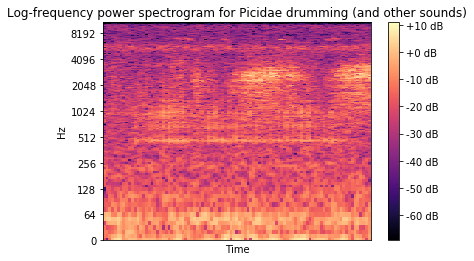

In [120]:
# load sounds with librosa
picidae_sound, _ = librosa.load(picidae_file)

def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(6, 4))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()
    
plot_spectrogram(picidae_sound, "Picidae drumming (and other sounds)")

In [121]:
# look for more Picidae observations in order to find better samples, hopefully without other load sounds 
picidae = df_data[(df_data['Species_common_name'] == 'Picidae') & ((df_data['Audio_visual'] == 'A') | (df_data['Audio_visual'] == 'AV'))]
display(picidae)
print('number of samples: ', len(picidae))

4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes
80,76,18_03_06_3,E100 edge,Picidae,30,NaN,NaN,A,NaN
87,83,18_03_06_4,E100 edge,Picidae,20,00:07:08,01:07:08 PM,AV,NaN
101,97,18_03_06_5,E100 edge,Picidae,20,00:02:31,02:02:31 PM,A,heard drumming
102,98,18_03_06_5,E100 edge,Picidae,50,00:03:42,02:03:42 PM,A,"drumming, could be same as recorded on 2:03:42 PM"
137,133,18_03_07_1,D100 641,Picidae,10,00:13:28,09:28:28 AM,A,"triiiiii, sounded like small woodpecker=maroon..."
162,158,18_03_07_3,D100 641,Picidae,20,00:02:35,11:02:35 AM,A,NaN
3214,3210,18_06_13_2,E1 648,Picidae,17,00:03:40,10:03:40 AM,A,NaN
3456,3452,18_06_15_2,VJR 1,Picidae,16,00:01:40,12:01:40 PM,A,"Tid tid, same as PC1 at 5:48"
3507,3503,18_06_20_1,E100 edge,Picidae,20,00:07:03,10:07:03 AM,A,soft drumming
3517,3513,18_06_20_1,E100 edge,Picidae,20,00:19:11,10:19:11 AM,A,Triiiiii = small wp: also audible at 20:11


number of samples:  26


#### Conclusion regarding Picidae species
with 26 observations of Picidae species, it might be a good idea to compare the spectograms of those samples

---

### Data visualization
In terms of plotting charts, the above Picidae dataset is not particularly interesting. We could analyse the time of the day of observations, or weather conditions, but we don't seem to have enough data with even distribution thought the day to be able to draw solid conclusions. 

Given the frame of the data collection however, one interesting datapoint might be the latitude and longitude from the ‘locations’ dataframe. Since the different locations are associated with different levels of human activity, biodiversity-loss might be proven through analysing the spatial information. 

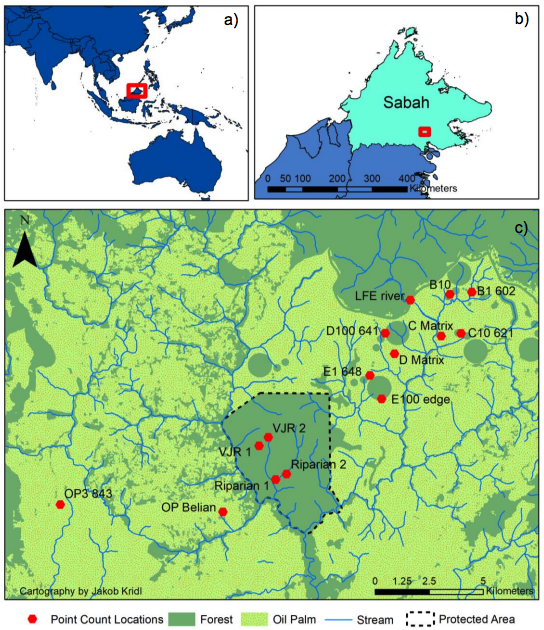

In [122]:
from IPython.display import Image
Image(filename='study_area.png') 

**Map of the study area and sampling locations at the SAFE project in Sabah, Malaysian Borneo.** Red points correspond to the 15 sampling sites where bird point counts were conducted (c) in different land-use types, where labels refer to the site names. 

- There are four sites in old growth forests (VJR 1, VJR 2, Riparian 1 and Riparian 2), 
- two sites in oil palm (OP Belian and OP3 843), 
- two sites in salvage-logged forest (C Matrix and D Matrix) 
- and seven sites in selectively logged forest (E100 edge, D100 641, C10 621, E1 648, B10, B1 602 and LFE river). 

Forest cover and oil palm area data were obtained from Gaveau, Salim, & Arjasakusuma (2016). SAFE study region (forest fragment boundaries and oil palm area) and stream network data were obtained from Ewers and Orme (2019) and Orme (2019), respectively.

Via *Kridl, J. (2021) Bird species co-occurrence patterns indicate altered community structure along a habitat quality gradient in Borneo. Unpublished Masters Thesis, University College London.*

In [123]:
# defining a dict of disturbance categories 
disturbance = {
    'VJR 1':'old_growth_forest', 
    'VJR 2':'old_growth_forest', 
    'Riparian 1':'old_growth_forest', 
    'Riparian 2':'old_growth_forest',
    'OP Belian':'oil_palm',
    'OP3 843':'oil_palm',
    'C Matrix':'salvage_logged_forest',
    'D Matrix':'salvage_logged_forest',
}
# the rest is 'selectively_logged_forest'

df_data['Site_type'] = df_data['Site'].map(disturbance)
df_data['Site_type'] = df_data['Site_type'].fillna('selectively_logged_forest')
df_data.sort_values(by = 'Notes').head(15)

4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes,Site_type
844,840,18_03_27_3,E1 648,NaN,12,00:08:27,06:08:27 PM,A,Whreiwhreiwhreiwhreiwhrei. = babbler sp? JA148,selectively_logged_forest
253,249,18_03_08_3,C10 621,Red-throated Sunbird,8,00:05:06,12:05:06 PM,A,XC444150,selectively_logged_forest
281,277,18_03_08_4,C10 621,Dark-necked Tailorbird,5,00:12:45,01:12:45 PM,A,XC444252,selectively_logged_forest
11835,11831,19_11_18_01_JA,D100 641,Black-naped Monarch,12,00:01:33,06:07:33 AM,A,"also at 1:42, 4:48, 14:27",selectively_logged_forest
7167,7163,19_01_30_1,VJR 2,Arachnothera,17,00:11:29,06:22:29 AM,A,#NAME?,old_growth_forest
1473,1469,18_04_05_1,C Matrix,Phew-bird,20,00:00:40,03:00:40 PM,A,' = ferruginous babbler,salvage_logged_forest
2039,2035,18_04_27_4,E1 648,Greater Coucal,20,00:00:21,07:00:21 AM,A,"0.5khz, boop boop boop, 1note/s",selectively_logged_forest
9829,9825,19_09_17_02,VJR 2,NaN,NaN,00:00:00,07:00:00 PM,A,0:01:23,old_growth_forest
9830,9826,19_09_17_02,VJR 2,NaN,NaN,00:00:00,07:00:00 PM,A,0:06:21,old_growth_forest
9865,9861,19_09_18_01,C10 621,NaN,NaN,00:00:00,06:00:00 PM,A,0:08:34,selectively_logged_forest


In [124]:
# checking the ratio of observations/recording
# however these numbers are probably still biased as not all animals audible on the recordings are noted down by the surveyors 
samples = df_data['Site'].value_counts().to_frame().reset_index()
samples.columns = ['Site', 'Total nr of observations']

samples['Site_type'] = samples['Site'].map(disturbance)
samples['Site_type'] = samples['Site_type'].fillna('selectively_logged_forest')
samples = samples[['Site', 'Site_type', 'Total nr of observations']]

nr_of_rec = df_rec['Site'].value_counts().to_frame().reset_index()
nr_of_rec.columns = ['Site', 'Total nr of recordings']

samples_recordings = pd.merge(samples, nr_of_rec, on = 'Site')
samples_recordings['observation / recording'] = samples_recordings['Total nr of observations'] / samples_recordings['Total nr of recordings']                                                   
samples_recordings.sort_values(by = 'observation / recording', ascending = False)

,Site,Site_type,Total nr of observations,Total nr of recordings,observation / recording
0,C Matrix,salvage_logged_forest,1314,84,15.642857
2,C10 621,selectively_logged_forest,1196,98,12.204082
3,D Matrix,salvage_logged_forest,1190,102,11.666667
1,OP Belian,oil_palm,1250,120,10.416667
4,OP3 843,oil_palm,1089,114,9.552632
7,VJR 2,old_growth_forest,878,97,9.051546
8,E1 648,selectively_logged_forest,839,96,8.739583
6,VJR 1,old_growth_forest,889,102,8.715686
5,D100 641,selectively_logged_forest,906,109,8.311927
9,E100 edge,selectively_logged_forest,796,113,7.044248


#### Mapping with Geopandas

In [125]:
# rename 'Location name' to 'Site' to be able to merge 
locations.columns = ['Site', 'New', 'Latitude', 'Longitude', 'Type', 'Elevation',
       'ET before arrival', 'Notes']

# link location data to the picidae dataframe
picidae_loc = pd.merge(picidae, locations, on=['Site'])
picidae_loc.head()

,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes_x,New,Latitude,Longitude,Type,Elevation,ET before arrival,Notes_y
0,76,18_03_06_3,E100 edge,Picidae,30,NaN,NaN,A,NaN,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
1,83,18_03_06_4,E100 edge,Picidae,20,00:07:08,01:07:08 PM,AV,NaN,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
2,97,18_03_06_5,E100 edge,Picidae,20,00:02:31,02:02:31 PM,A,heard drumming,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
3,98,18_03_06_5,E100 edge,Picidae,50,00:03:42,02:03:42 PM,A,"drumming, could be same as recorded on 2:03:42 PM",yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
4,3503,18_06_20_1,E100 edge,Picidae,20,00:07:03,10:07:03 AM,A,soft drumming,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves


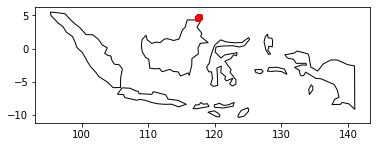

In [126]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoDataFrame(
    picidae_loc, geometry = gpd.points_from_xy(picidae_loc.Longitude, picidae_loc.Latitude))

ax = world[world.name == 'Indonesia'].plot(color='white', edgecolor='black')

gdf.plot(ax = ax, color = 'red')
plt.show()

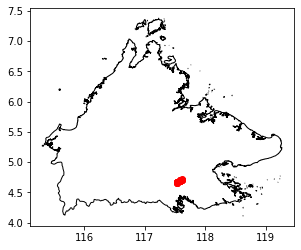

In [127]:
# in order to zoom in, we can load our own shapefiles
# datasource: https://earthworks.stanford.edu/catalog/stanford-qg469kj1734

sabah = gpd.read_file('shp/sabah/test.shp')
ax = sabah.plot(color = 'white', edgecolor = 'black')
gdf.plot(ax = ax, color = 'red')

plt.show()

### 5. Next steps
It seems that the currently provided data has its limitations as training data. Before we start building machine learning algorithms to identify different animal species from audiodata, we must aim to label existing recordings better. 

#### a. Determin which species have the most potential to be labelled correctly  
One possible direction to go with analysing our dataset is to identify which animals could be detected the easiest / have the most distinctive sound and then start with labelling those. This can be the starting point for supervised machine learning algorithms. 

#### b. Analysing soundscapes and geospatial data
Another direction can be to work more in detail with the geospatial data, collect more quantifiable information about the sites, and in general analyse the soundscapes as a whole without distinguishing species, to detect changes on a larger scale.